<a href="https://colab.research.google.com/github/Davron030901/Data_Science/blob/main/Data_Science_Advanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Data Science - Linear Regression***

**Linear Regression**

The term regression is used when you try to find the relationship between variables.

In Machine Learning and in statistical modeling, that relationship is used to predict the outcome of events.

In this module, we will cover the following questions:

* Can we conclude that Average_Pulse and Duration are related to Calorie_Burnage?
* Can we use Average_Pulse and Duration to predict Calorie_Burnage?

*Least Square Method*

Linear regression uses the least square method.

The concept is to draw a line through all the plotted data points. The line is positioned in a way that it minimizes the distance to all of the data points.

The distance is called "residuals" or "errors".

The red dashed lines represents the distance from the data points to the drawn mathematical function.

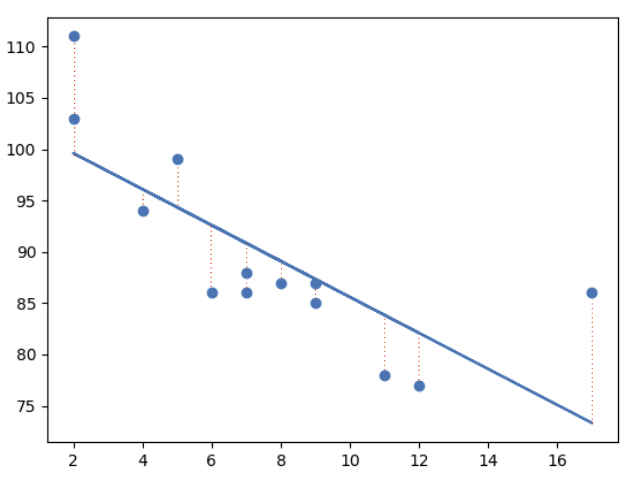

*Linear Regression Using One Explanatory Variable*

In this example, we will try to predict Calorie_Burnage with Average_Pulse using Linear Regression:

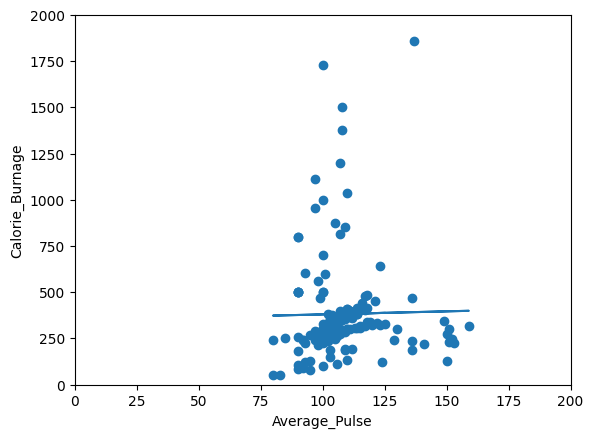

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

full_health_data = pd.read_csv("data.csv", header=0, sep=",")

x = full_health_data["Average_Pulse"]
y = full_health_data ["Calorie_Burnage"]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
 return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, slope * x + intercept)
plt.ylim(ymin=0, ymax=2000)
plt.xlim(xmin=0, xmax=200)
plt.xlabel("Average_Pulse")
plt.ylabel ("Calorie_Burnage")
plt.show()

Do you think that the line is able to predict Calorie_Burnage precisely?

We will show that the variable Average_Pulse alone is not enough to make precise prediction of Calorie_Burnage.

***Data Science - Regression Table***

**Regression Table**

The output from linear regression can be summarized in a regression table.

The content of the table includes:

* Information about the model
* Coefficients of the linear regression function
* Regression statistics
* Statistics of the coefficients from the linear regression function
* Other information that we will not cover in this module


**Create a Linear Regression Table in Python**

Here is how to create a linear regression table in Python:

In [3]:
import pandas as pd
import statsmodels.formula.api as smf

full_health_data = pd.read_csv("data.csv", header=0, sep=",")

model = smf.ols('Calorie_Burnage ~ Average_Pulse', data = full_health_data)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Calorie_Burnage   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                   0.04975
Date:                Fri, 01 Nov 2024   Prob (F-statistic):              0.824
Time:                        17:32:21   Log-Likelihood:                -1145.8
No. Observations:                 163   AIC:                             2296.
Df Residuals:                     161   BIC:                             2302.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       346.8662    160.615      2.160

Example Explained:

* Import the library statsmodels.formula.api as smf. Statsmodels is a statistical library in Python.
* Use the full_health_data set.
* Create a model based on Ordinary Least Squares with smf.ols(). Notice that the explanatory variable must be written first in the parenthesis. Use the full_health_data data set.
* By calling .fit(), you obtain the variable results. This holds a lot of information about the regression model.
* Call summary() to get the table with the results of linear regression.


***Data Science - Regression Table - Info***

The "Information Part" in Regression Table

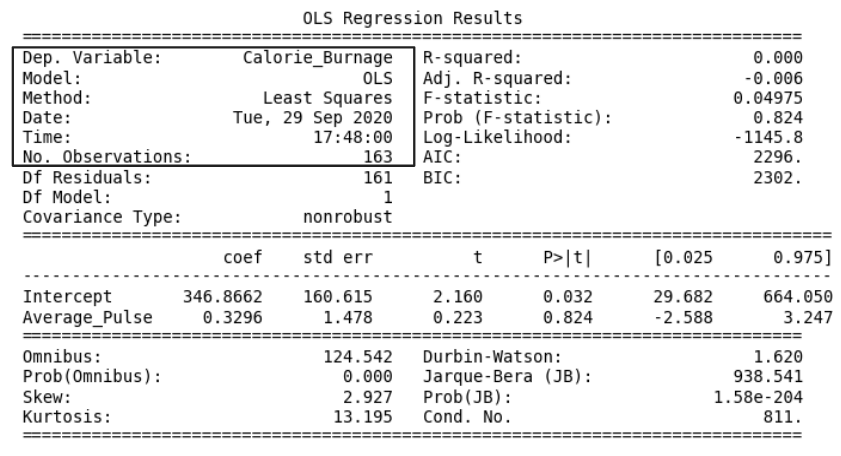

*  *Dep. Variable*: is short for "Dependent Variable". Calorie_Burnage is here the dependent variable. The Dependent variable is here assumed to be explained by Average_Pulse.
*  *Model*  : OLS is short for Ordinary Least Squares. This is a type of model that uses the Least Square method.
*  *Date*  : and Time: shows the date and time the output was calculated in Python.

***Data Science - Regression Table - Coefficients***

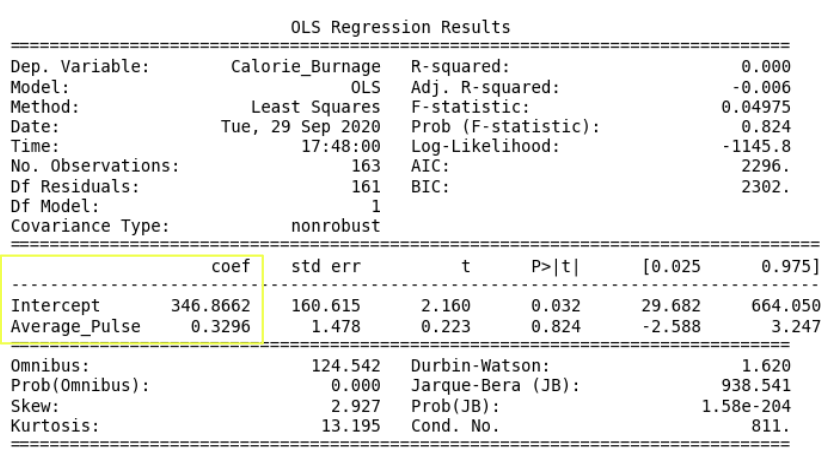

* Coef is short for coefficient. It is the output of the linear regression function.
The linear regression function can be rewritten mathematically as:

* Calorie_Burnage = 0.3296 * Average_Pulse + 346.8662
These numbers means:

If Average_Pulse increases by 1, Calorie_Burnage increases by 0.3296 (or 0,3 rounded)
If Average_Pulse = 0, the Calorie_Burnage is equal to 346.8662 (or 346.9 rounded).
Remember that the intercept is used to adjust the model's precision of predicting!
Do you think that this is a good model?

Define the Linear Regression Function in Python
Define the linear regression function in Python to perform predictions.

What is Calorie_Burnage if Average_Pulse is: 120, 130, 150, 180?



In [4]:
def Predict_Calorie_Burnage(Average_Pulse):
 return(0.3296*Average_Pulse + 346.8662)

print(Predict_Calorie_Burnage(120))
print(Predict_Calorie_Burnage(130))
print(Predict_Calorie_Burnage(150))
print(Predict_Calorie_Burnage(180))

386.4182
389.7142
396.3062
406.1942


***Data Science - Regression Table: P-Value***

***Data Science - Regression Table: P-Value***

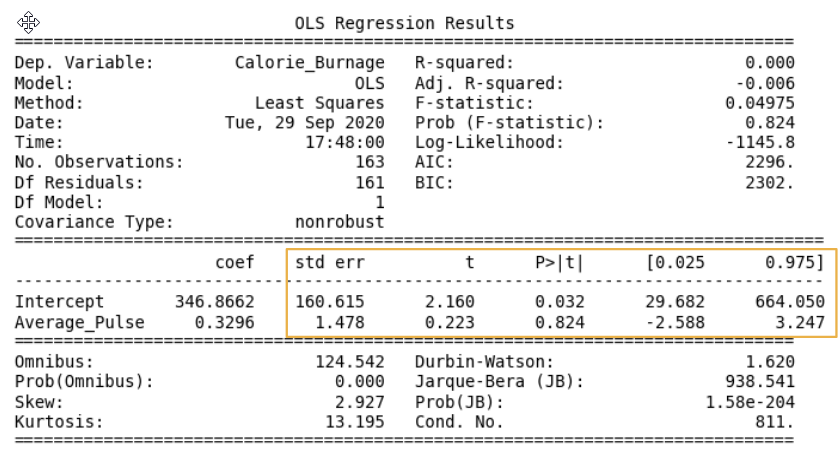

There are four components that explains the statistics of the coefficients:

* std err stands for Standard Error
* t is the "t-value" of the coefficients
* P>|t| is called the "P-value"
* [0.025  0.975] represents the confidence interval of the coefficients

We will focus on understanding the "P-value" in this module.

**The P-value**

The P-value is a statistical number to conclude if there is a relationship between Average_Pulse and Calorie_Burnage.

We test if the true value of the coefficient is equal to zero (no relationship). The statistical test for this is called Hypothesis testing.

A low P-value (< 0.05) means that the coefficient is likely not to equal zero.
A high P-value (> 0.05) means that we cannot conclude that the explanatory variable affects the dependent variable (here: if Average_Pulse affects Calorie_Burnage).
A high P-value is also called an insignificant P-value.

**Hypothesis Testing**

Hypothesis testing is a statistical procedure to test if your results are valid.

In our example, we are testing if the true coefficient of Average_Pulse and the intercept is equal to zero.

Hypothesis test has two statements. The null hypothesis and the alternative hypothesis.

The null hypothesis can be shortly written as H0
The alternative hypothesis can be shortly written as HA
Mathematically written:

* H0: Average_Pulse = 0
* HA: Average_Pulse ≠ 0
* H0: Intercept = 0
* HA: Intercept ≠ 0

The sign ≠ means "not equal to"

*Hypothesis Testing and P-value*

The null hypothesis can either be rejected or not.

If we reject the null hypothesis, we conclude that it exist a relationship between Average_Pulse and Calorie_Burnage. The P-value is used for this conclusion.

A common threshold of the P-value is 0.05.

Note: A P-value of 0.05 means that 5% of the times, we will falsely reject the null hypothesis. It means that we accept that 5% of the times, we might falsely have concluded a relationship.

If the P-value is lower than 0.05, we can reject the null hypothesis and conclude that it exist a relationship between the variables.

However, the P-value of Average_Pulse is 0.824. So, we cannot conclude a relationship between Average_Pulse and Calorie_Burnage.

It means that there is a 82.4% chance that the true coefficient of Average_Pulse is zero.

The intercept is used to adjust the regression function's ability to predict more precisely. It is therefore uncommon to interpret the P-value of the intercept.



***Data Science - Regression Table: R-Squared***

*R - Squared*

R-Squared and Adjusted R-Squared describes how well the linear regression model fits the data points:

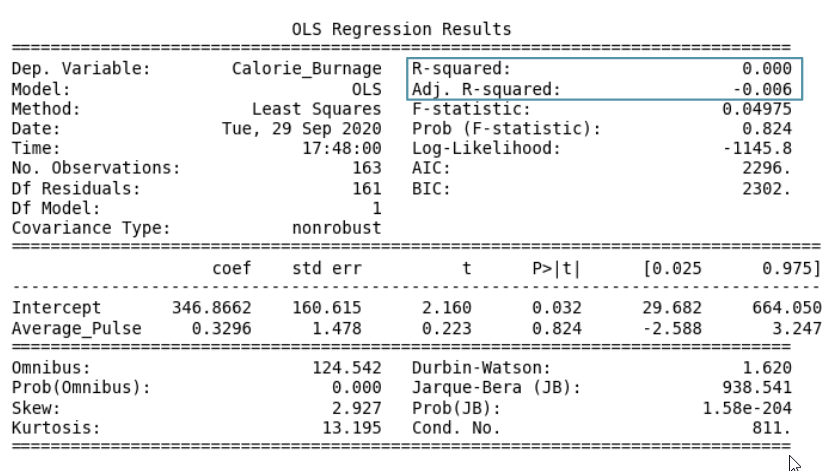

The value of R-Squared is always between 0 to 1 (0% to 100%).

A high R-Squared value means that many data points are close to the linear regression function line.
A low R-Squared value means that the linear regression function line does not fit the data well.

**Visual Example of a Low R - Squared Value (0.00)**

Our regression model shows a R-Squared value of zero, which means that the linear regression function line does not fit the data well.

This can be visualized when we plot the linear regression function through the data points of Average_Pulse and Calorie_Burnage.

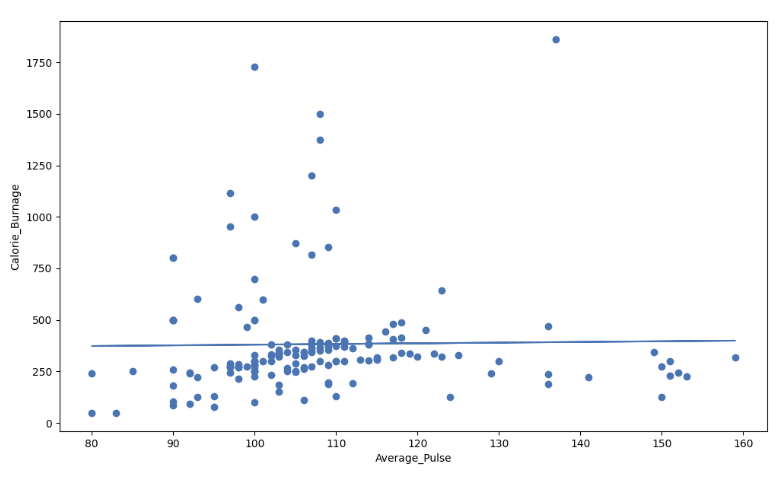

*Visual Example of a High R - Squared Value (0.79)*

However, if we plot Duration and Calorie_Burnage, the R-Squared increases. Here, we see that the data points are close to the linear regression function line:



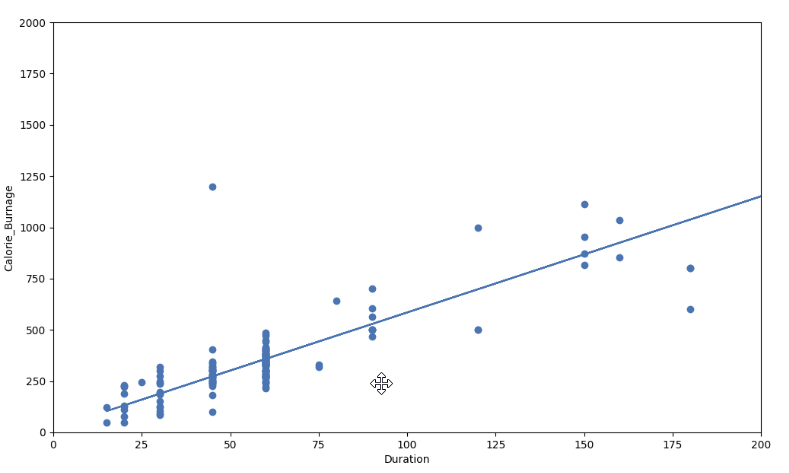

[358.21715450527273, 358.21715450527273, 358.21715450527273, 273.2544822252611, 273.2544822252611, 358.21715450527273, 358.21715450527273, 273.2544822252611, 188.29180994524933, 358.21715450527273, 358.21715450527273, 358.21715450527273, 358.21715450527273, 358.21715450527273, 358.21715450527273, 358.21715450527273, 358.21715450527273, 273.2544822252611, 358.21715450527273, 273.2544822252611, 358.21715450527273, 273.2544822252611, 358.21715450527273, 273.2544822252611, 358.21715450527273, 358.21715450527273, 358.21715450527273, 358.21715450527273, 358.21715450527273, 358.21715450527273, 358.21715450527273, 358.21715450527273, 358.21715450527273, 358.21715450527273, 358.21715450527273, 358.21715450527273, 358.21715450527273, 273.2544822252611, 358.21715450527273, 358.21715450527273, 358.21715450527273, 358.21715450527273, 358.21715450527273, 358.21715450527273, 273.2544822252611, 273.2544822252611, 358.21715450527273, 358.21715450527273, 471.50071754528835, 358.21715450527273, 358.21715

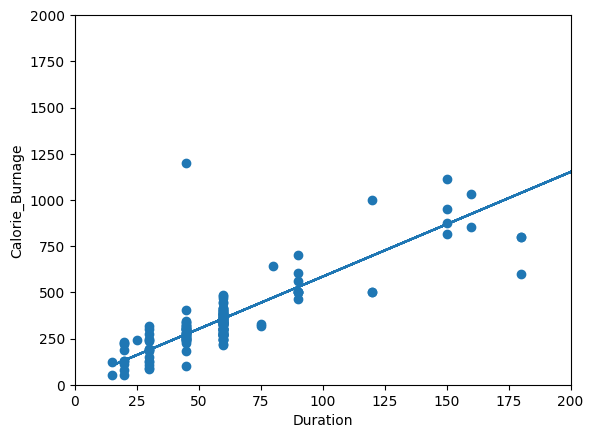

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

full_health_data = pd.read_csv("data.csv", header=0, sep=",")

x = full_health_data["Duration"]
y = full_health_data ["Calorie_Burnage"]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
 return slope * x + intercept

mymodel = list(map(myfunc, x))

print(mymodel)

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.ylim(ymin=0, ymax=2000)
plt.xlim(xmin=0, xmax=200)
plt.xlabel("Duration")
plt.ylabel ("Calorie_Burnage")

plt.show()

*Summary - Predicting Calorie_Burnage with Average_Pulse*

How can we summarize the linear regression function with Average_Pulse as explanatory variable?

* Coefficient of 0.3296, which means that Average_Pulse has a very small effect on Calorie_Burnage.
* High P-value (0.824), which means that we cannot conclude a relationship between Average_Pulse and Calorie_Burnage.
* R-Squared value of 0, which means that the linear regression function line does not fit the data well.


***Data Science - Linear Regression Case***

*Case: Use Duration + Average_Pulse to Predict Calorie_Burnage*

Create a Linear Regression Table with Average_Pulse and Duration as Explanatory Variables:



In [6]:
import pandas as pd
import statsmodels.formula.api as smf

full_health_data = pd.read_csv("data.csv", header=0, sep=",")

model = smf.ols('Calorie_Burnage ~ Average_Pulse + Duration', data = full_health_data)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Calorie_Burnage   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     355.8
Date:                Fri, 01 Nov 2024   Prob (F-statistic):           1.27e-59
Time:                        17:55:31   Log-Likelihood:                -1007.7
No. Observations:                 163   AIC:                             2021.
Df Residuals:                     160   BIC:                             2031.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -334.5194     73.616     -4.544

*Example Explained:*

* Import the library statsmodels.formula.api as smf. Statsmodels is a statistical library in Python.
* Use the full_health_data set.
* Create a model based on Ordinary Least Squares with smf.ols(). Notice that the explanatory variable must be written first in the parenthesis. Use the full_health_data data set.
* By calling .fit(), you obtain the variable results. This holds a lot of information about the regression model.
* Call summary() to get the table with the results of linear regression.

The linear regression function can be rewritten mathematically as:

* Calorie_Burnage = Average_Pulse * 3.1695 + Duration * 5.8424 - 334.5194
Rounded to two decimals:

* Calorie_Burnage = Average_Pulse * 3.17 + Duration * 5.84 - 334.52


*Define the Linear Regression Function in Python*

Define the linear regression function in Python to perform predictions.

What is Calorie_Burnage if:

Average pulse is 110 and duration of the training session is 60 minutes?
Average pulse is 140 and duration of the training session is 45 minutes?
Average pulse is 175 and duration of the training session is 20 minutes?


In [7]:
def Predict_Calorie_Burnage(Average_Pulse, Duration):
 return(3.1695*Average_Pulse + 5.8434 * Duration - 334.5194)

print(Predict_Calorie_Burnage(110,60))
print(Predict_Calorie_Burnage(140,45))
print(Predict_Calorie_Burnage(175,20))

364.7296
372.1636
337.01110000000006


The Answers:

Average pulse is 110 and duration of the training session is 60 minutes = 365 Calories
Average pulse is 140 and duration of the training session is 45 minutes = 372 Calories
Average pulse is 175 and duration of the training session is 20 minutes = 337 Calories


*Access the Coefficients*

Look at the coefficients:

Calorie_Burnage increases with 3.17 if Average_Pulse increases by one.
Calorie_Burnage increases with 5.84 if Duration increases by one.

*Access the P-Value*

Look at the P-value for each coefficient.

P-value is 0.00 for Average_Pulse, Duration and the Intercept.
The P-value is statistically significant for all of the variables, as it is less than 0.05.
So here we can conclude that Average_Pulse and Duration has a relationship with Calorie_Burnage.

*Adjusted R-Squared*
There is a problem with R-squared if we have more than one explanatory variable.

R-squared will almost always increase if we add more variables, and will never decrease.

This is because we are adding more data points around the linear regression function.

If we add random variables that does not affect Calorie_Burnage, we risk to falsely conclude that the linear regression function is a good fit. Adjusted R-squared adjusts for this problem.

It is therefore better to look at the adjusted R-squared value if we have more than one explanatory variable.

The Adjusted R-squared is 0.814.

The value of R-Squared is always between 0 to 1 (0% to 100%).

A high R-Squared value means that many data points are close to the linear regression function line.
A low R-Squared value means that the linear regression function line does not fit the data well.
Conclusion: The model fits the data point well!

Congratulations! You have now finished the final module of the data science library.

